
# Titanic: Machine Learning from Disaster
## Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.
## Data Dictionary

VariableDefinitionKey survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd sex Sex Age Age in years sibsp # of siblings / spouses aboard the Titanic parch # of parents / children aboard the Titanic ticket Ticket number fare Passenger fare cabin Cabin number embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
## Variable Notes

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them

# Importing Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# Importing the Datasets

In [2]:
#importing 'train.csv' dataset and creating into 'df1' dataframe 
df1= pd.read_csv('train.csv')

#importing 'test.csv' dataset and creating into 'df2' dataframe
df2= pd.read_csv('test.csv')

# Printing the first 10 rows of the Datasets

In [3]:
#df1 dataset
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#df2 dataset
df2.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Checking the 'NAN' values in the DataFrames

In [5]:
#checking 'NAN' values for the df1 DataFrame
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#checking 'NAN' values for the df2 DataFrame
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Checking the Data-types of series in DataFrame

In [7]:
#checking the datatypes of series in df1 DataFrame
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#checking the datatypes of series in df2 DataFrame
df2.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Filling 'NAN' values

In [9]:
#first filling the 'NAN' values from df1['Embarked']
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
#checking the unique values from df1['Embarked']
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
#filling the "NAN" value by most_frequent method
df1['Embarked'].fillna('S',inplace=True)

#checking the df1['Embarked']
df1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

# Checking the shape of the DataFrame

In [12]:
#checking the shape of the df1 DataFrame
df1.shape

(891, 12)

In [13]:
#checking the shape of the df2 DataFrame
df2.shape

(418, 11)

# Checking the details of the DataFrame

In [14]:
#checking the details of the df1 DataFrame
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
#checking the details of the df2 DataFrame
df2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Creating New Column Name 'Title' in DataFrame

In [16]:
# defining function for creating new column name 'title' in DataFrame
import re

def title(df):
    title=[]
    for x in df['Name']:
        x=re.findall(' ([A-Za-z]+)\.', x)
        x=x[0]
        title.append(x)
    title=pd.DataFrame(title,columns=['Title'])
    y=['Dr','Rev','Col','Don','Major','Mlle','Mme','Ms','Capt','Lady','Jonkheer','Sir','Countess']
    for x in title['Title']:
        if x in y:
            title['Title'].replace(x,'Rare', inplace=True)
        else:
            continue
    df=pd.concat([df,title],axis=1)
    return df

In [17]:
#creating new column name 'title' in df1 dataframe
df1=title(df1)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
#creating new column name 'title' in df2 dataframe
df2=title(df2)
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


# Data Visualization

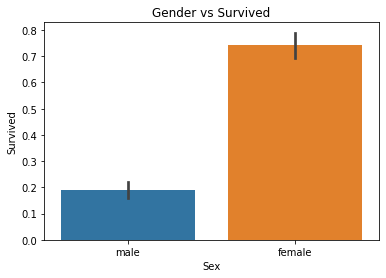

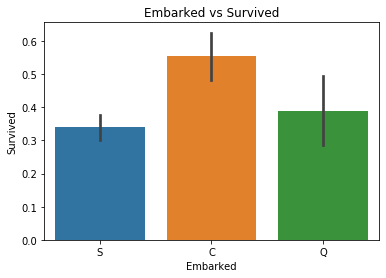

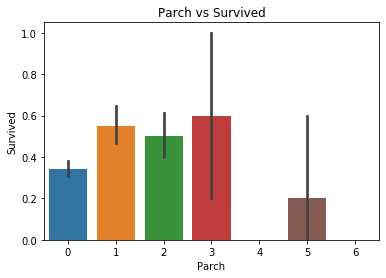

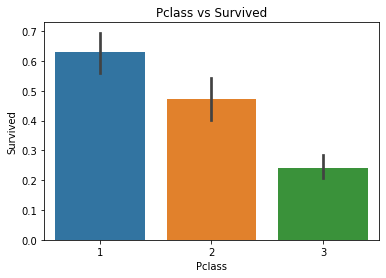

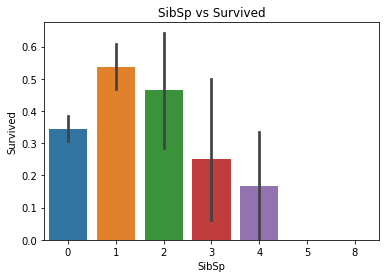

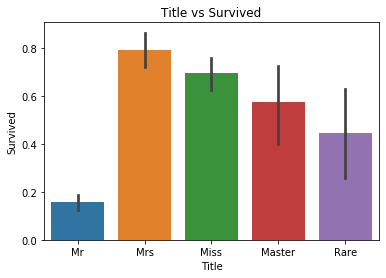

In [19]:
#graph gender vs survived
plt.title('Gender vs Survived')
sns.barplot(x=df1['Sex'],y=df1['Survived'])
plt.show()

#graph embarked vs survived
plt.title('Embarked vs Survived')
sns.barplot(x=df1['Embarked'],y=df1['Survived'])
plt.show()

#graph parch vs survived
plt.title('Parch vs Survived')
sns.barplot(x=df1['Parch'],y=df1['Survived'])
plt.show()

#graph pclass vs survived
plt.title('Pclass vs Survived')
sns.barplot(x=df1['Pclass'],y=df1['Survived'])
plt.show()

#graph sibsp vs survived
plt.title('SibSp vs Survived')
sns.barplot(x=df1['SibSp'],y=df1['Survived'])
plt.show()  

#graph Title vs survived
plt.title('Title vs Survived')
sns.barplot(x=df1['Title'],y=df1['Survived'])
plt.show()

# Making X, y and df2_test DataFrame

In [20]:
#creating X , y and df2_test
X=df1.iloc[:,[2,4,5,6,7,9,11,12]].values
y=df1.iloc[:,1:2].values
df2_test=df2.iloc[:,[1,3,4,5,6,8,10,11]].values


In [21]:
#checking X
X[:5]

array([[3, 'male', 22.0, 1, 0, 7.25, 'S', 'Mr'],
       [1, 'female', 38.0, 1, 0, 71.2833, 'C', 'Mrs'],
       [3, 'female', 26.0, 0, 0, 7.925, 'S', 'Miss'],
       [1, 'female', 35.0, 1, 0, 53.1, 'S', 'Mrs'],
       [3, 'male', 35.0, 0, 0, 8.05, 'S', 'Mr']], dtype=object)

In [22]:
#checking y
y[:5]

array([[0],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [23]:
#checking df2_test
df2_test[:5]

array([[3, 'male', 34.5, 0, 0, 7.8292, 'Q', 'Mr'],
       [3, 'female', 47.0, 1, 0, 7.0, 'S', 'Mrs'],
       [2, 'male', 62.0, 0, 0, 9.6875, 'Q', 'Mr'],
       [3, 'male', 27.0, 0, 0, 8.6625, 'S', 'Mr'],
       [3, 'female', 22.0, 1, 1, 12.2875, 'S', 'Mrs']], dtype=object)

# Filling the Missing Values from DataFrame

In [24]:
from sklearn.preprocessing import Imputer

#imputer numerical variable in X and df2_test Dataframe with mean
imputer = Imputer(missing_values=np.nan,strategy="mean",axis=0) 
X[:,[2]] = imputer.fit_transform(X[:,[2]])
df2_test[:,[2]]= imputer.fit_transform(df2_test[:,[2]])
df2_test[:,[5]]= imputer.fit_transform(df2_test[:,[5]])


C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Label Encoding and OneHotEncoding of DataFrame

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoderX = LabelEncoder()

#label encoding for 'sex' column in X and df2_test
X[:,1] = labelencoderX.fit_transform(X[:,1])
df2_test[:,1] = labelencoderX.fit_transform(df2_test[:,1])

#label encoding for 'embarked' column in X and df2_test
X[:,6] = labelencoderX.fit_transform(X[:,6])
df2_test[:,6] = labelencoderX.fit_transform(df2_test[:,6])

#label encoding for 'title' column in X and df2_test
X[:,7] = labelencoderX.fit_transform(X[:,7])
df2_test[:,7] = labelencoderX.fit_transform(df2_test[:,7])

#onehotencoder for X and df2_test
onehotencoder = OneHotEncoder(categorical_features=[0])
X = onehotencoder.fit_transform(X).toarray()
onehotencoder1 = OneHotEncoder(categorical_features=[0])
df2_test = onehotencoder1.fit_transform(df2_test).toarray()


C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integ

In [26]:
#Checking X
X[:5]

array([[ 0.    ,  0.    ,  1.    ,  1.    , 22.    ,  1.    ,  0.    ,
         7.25  ,  2.    ,  2.    ],
       [ 1.    ,  0.    ,  0.    ,  0.    , 38.    ,  1.    ,  0.    ,
        71.2833,  0.    ,  3.    ],
       [ 0.    ,  0.    ,  1.    ,  0.    , 26.    ,  0.    ,  0.    ,
         7.925 ,  2.    ,  1.    ],
       [ 1.    ,  0.    ,  0.    ,  0.    , 35.    ,  1.    ,  0.    ,
        53.1   ,  2.    ,  3.    ],
       [ 0.    ,  0.    ,  1.    ,  1.    , 35.    ,  0.    ,  0.    ,
         8.05  ,  2.    ,  2.    ]])

In [27]:
#checking df2_test
df2_test[:5]

array([[ 0.    ,  0.    ,  1.    ,  1.    , 34.5   ,  0.    ,  0.    ,
         7.8292,  1.    ,  3.    ],
       [ 0.    ,  0.    ,  1.    ,  0.    , 47.    ,  1.    ,  0.    ,
         7.    ,  2.    ,  4.    ],
       [ 0.    ,  1.    ,  0.    ,  1.    , 62.    ,  0.    ,  0.    ,
         9.6875,  1.    ,  3.    ],
       [ 0.    ,  0.    ,  1.    ,  1.    , 27.    ,  0.    ,  0.    ,
         8.6625,  2.    ,  3.    ],
       [ 0.    ,  0.    ,  1.    ,  0.    , 22.    ,  1.    ,  1.    ,
        12.2875,  2.    ,  4.    ]])

# Data Standardization

In [28]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()

#Standardization of X
X = scX.fit_transform(X)

#Standardization of df2_test
df2_test = scX.fit_transform(df2_test)


# Data Decomposition

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)

#data decomposition for X
X= pca.fit_transform(X)

#data decomposition for df2_test
df2_test = pca.transform(df2_test)

#print the explain variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([2.42904706e-01, 1.92703209e-01, 1.50094852e-01, 1.02735631e-01,
       9.29156492e-02, 7.30679174e-02, 5.58748427e-02, 5.01235716e-02,
       3.95796211e-02, 2.34511041e-31])

# Splitting X and y Using train_test_split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#printing the shapes
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (623, 10)
Shape of X_test: (268, 10)
Shape of y_train: (623, 1)
Shape of y_test: (268, 1)


# Pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

lr=Pipeline([('lr_classifier',LogisticRegression())])
dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])
rf=Pipeline([('rf_classifier',RandomForestClassifier())])

#making the list of pipeline
pipelines=[lr,dt,rf]

best_accuracy=0.0
best_pipeline=""

#Dictionary of pipeline and classifier types for ease of reference
pipe_dict={0:'Logistic Regression',1:'Decision Tree',2:'randomForest'}

#Fit the pipeline
for pipe in pipelines:
    pipe.fit(X_train,y_train)

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [32]:
#checking which model perform best
for i, model in enumerate(pipelines):
    print('{} Test Accuray:{}'.format(pipe_dict[i],model.score(X_train,y_train)))

Logistic Regression Test Accuray:0.7961476725521669
Decision Tree Test Accuray:0.9871589085072231
randomForest Test Accuray:0.9727126805778491


# Creating Decision Tree model 

In [33]:
#using Decision Tree model for predicting results
model=DecisionTreeClassifier()

#trainnig the model
model.fit(X_train,y_train)
pred=model.predict(X_test)
pred[:5]

array([1, 0, 1, 0, 0], dtype=int64)

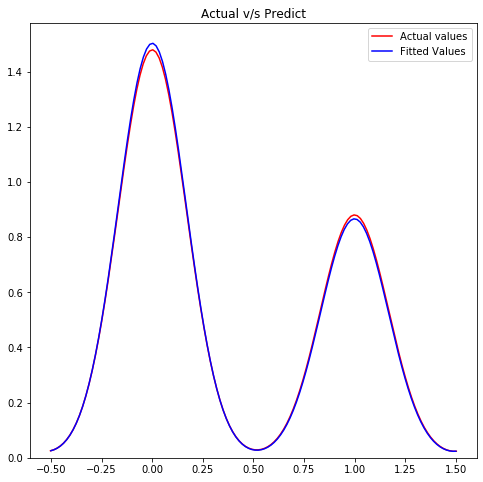

In [34]:
#checking model wheather it is overfitted or underfitted
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Actual v/s Predict')
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(pred,hist=False,color='b',label='Fitted Values',ax=ax1)

In [35]:
#checking accuracy of the model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#cross validation score
score=cross_val_score(model,X_train,y_train,cv=4)
print('Score=',score)
print('Score mean=',score.mean())

#cross validation prediction
predict=cross_val_predict(model,X_train,y_train,cv=4)
print('Predicts=',predict[0:5])

#r square score
r=model.score(X_train,y_train)
print('R-square=',r)

#mean squared error
mse=mean_squared_error(y_test,pred)
print('Mean Squared Error=',mse)

#accuracy score
print('Accuracy Score=',accuracy_score(y_test,pred))

#classification report
print('\nClassification Report:\n',classification_report(y_test,pred))

Score= [0.7133758  0.77564103 0.7483871  0.7483871 ]
Score mean= 0.7464477538419392
Predicts= [1 1 0 1 1]
R-square= 0.9871589085072231
Mean Squared Error= 0.26119402985074625
Accuracy Score= 0.7388059701492538

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       168
           1       0.65      0.64      0.65       100

    accuracy                           0.74       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.74      0.74      0.74       268



# Predicting the model on df2_test dataset

In [36]:
#model predicting for df2_test
result=model.predict(df2_test)
result[:5]

array([1, 1, 0, 0, 0], dtype=int64)

# Saving the Result

In [37]:
#creating a CSV file for saving the results
file = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived':result})
file.to_csv('my_submission_file.csv', index=False)
print("File is Created")

File is Created
